# Saber 11

Análisis de resultados

Saber 11: Prueba realizada por el Estado colombiano a estudiantes que finalizan la educación básica con la intención de medir el nivel académico de estudiantes (p ej: para acceder a educación superior) e instituciones educativas 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Opcional para no limitar la cantidad de columnas a mostrar en el navegador

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Ejemplo
Saber 11 2011-2

La descarga del archivo se da en: https://www.datos.gov.co/d/t6je-7yrd

Nota: El formato de tablas de las pruebas puede variar, como por ejemplo por los datos tomados que han cambiado y por la misma naturaleza de las pruebas y su evolución en el tiempo, en este caso a modo de ejemplo solo se usan los datos del 2011-2

In [3]:
df = pd.read_csv('Saber_11__2011-2.csv')
del df['estu_estudiante']
del df['periodo']
del df['estu_exam_nombreexamen']

/home/devgtc/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (26,75,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Ejemplo de cómo son los datos

In [4]:
df.head()

,estu_consecutivo,estu_edad,estu_tipo_documento,estu_pais_reside,estu_genero,estu_nacimiento_dia,estu_nacimiento_mes,estu_nacimiento_anno,estu_cod_reside_mcpio,estu_reside_mcpio,estu_reside_depto,estu_zona_reside,estu_area_reside,cole_valor_pension,estu_trabaja,fami_estrato_vivienda,estu_ies_cod_deseada,estu_ies_deseada_nombre,estu_ies_cod_mpio_deseada,estu_ies_mpio_deseada,estu_ies_dept_deseada,estu_mpio_presentacion,estu_dept_presentacion,estu_exam_cod_mpio_presentacio,estu_veces_estado,estu_carrdeseada_tipo,fami_educa_padre,fami_educa_madre,fami_ocup_padre,fami_ocup_madre,fami_nivel_sisben,fami_pisos_hogar,fami_personas_hogar,fami_telefono_fijo,fami_celular,fami_internet,fami_servicio_television,fami_computador,fami_lavadora,fami_nevera,fami_horno,fami_dvd,fami_microondas,fami_automovil,fami_ing_fmiliar_mensual,estu_anos_preescolar,estu_ano_matricula_primero,estu_ano_termino_quinto,estu_ano_matricula_sexto,estu_reprobo_primero,estu_reprobo_segundo,estu_reprobo_tercero,estu_reprobo_cuarto,estu_reprobo_quinto,estu_reprobo_sexto,estu_reprobo_septimo,estu_reprobo_octavo,estu_reprobo_noveno,estu_reprobo_decimo,estu_reprobo_once_mas,estu_anos_colegio_actual,estu_cuantos_cole_estudio,estu_razon_retiro,estu_total_alumnos_curso,estu_prestigioinstitucion,estu_por_ubicacion,estu_por_unicaqueofrece,estu_por_amigosestudiando,estu_por_otrarazon,estu_por_orientacionvocacional,estu_por_tradicionfamiliar,estu_por_influenciaalguien,cole_cod_icfes,cole_cod_dane_institucion,cole_nombre_sede,cole_cod_mcpio_ubicacion,cole_calendario,cole_genero,cole_naturaleza,cole_bilingue,cole_jornada,cole_caracter,punt_lenguaje,punt_matematicas,punt_c_sociales,punt_filosofia,punt_biologia,punt_quimica,punt_fisica,punt_ingles,desemp_ingles,nombre_comp_flexible,punt_comp_flexible,desemp_comp_flexible,estu_puesto
0,SABER1120112500774,16.0,T,CO,F,11.0,2.0,1995.0,05615,RIONEGRO,ANTIOQUIA,10.0,1.0,0.0,0.0,3.0,-,-,-,-,-,RIONEGRO,ANTIOQUIA,5615,0.0,-,12.0,12.0,14.0,14.0,3.0,3.0,5.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,24646,105615000236,I. E. ESCUELA NORMAL SUPERIOR DE MARIA,5615,A,X,O,0,COMPLETA U ORDINARIA,NORMALISTA,58.0,56.0,60.0,53.0,58.0,46.0,51.0,60.0,A2,PROFUNDIZACIÓN EN LENGUAJE,5.0,I,71.0
1,SABER1120112092263,17.0,T,CO,F,9.0,11.0,1993.0,44430,MAICAO,LA GUAJIRA,10.0,1.0,0.0,0.0,1.0,-,-,-,-,-,MAICAO,LA GUAJIRA,44430,0.0,-,12.0,12.0,21.0,22.0,1.0,2.0,5.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,126177,144430000511,COL. DPTAL DE BTO SAN JOSE - SEDE PRINCIPAL,44430,A,X,O,-,MAÑANA,TECNICO,30.0,31.0,41.0,40.0,45.0,47.0,47.0,47.0,A1,PROFUNDIZACIÓN EN LENGUAJE,5.0,I,770.0
2,SABER1120112413000,16.0,T,CO,F,10.0,7.0,1994.0,73001,IBAGUE,TOLIMA,10.0,1.0,8.0,0.0,3.0,-,-,-,-,-,IBAGUE,TOLIMA,73001,0.0,-,14.0,16.0,18.0,17.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,47928,373001006810,COL COOP LOS ANDES,73001,A,X,N,0,TARDE,ACADEMICO,43.0,31.0,41.0,44.0,51.0,50.0,39.0,49.0,A1,PROFUNDIZACIÓN EN LENGUAJE,5.0,I,608.0
3,SABER1120112345261,16.0,T,CO,F,4.0,4.0,1995.0,54001,CUCUTA,NORTE SANTANDER,10.0,1.0,0.0,0.0,1.0,-,-,-,-,-,CUCUTA,NORTE SANTANDER,54001,0.0,-,10.0,12.0,21.0,22.0,1.0,4.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,121244,154001004341,COL CLAUDIA MARIA PRADA AYALA,54001,A,X,O,0,TARDE,ACADEMICO Y TECNICO,39.0,45.0,43.0,29.0,44.0,50.0,31.0,41.0,A-,PROFUNDIZACIÓN EN MATEMÁTICA,5.0,I,621.0
4,SABER1120112324771,17.0,T,CO,F,11.0,6.0,1993.0,52540,POLICARPA,NARIÑO,10.0,2.0,0.0,0.0,1.0,-,-,-,-,-,PASTO,NARIÑO,52001,1.0,-,9.0,9.0,21.0,21.0,1.0,2.0,6.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,70631,252540000602,INSTITUCION EDUCATIVA AGROPECUARIA EL EJIDO,52540,A,X,O,0,MAÑANA,TECNICO,30.0,48.0,33.0,37.0,37.0,38.0,56.0,52.0,A1,PROFUNDIZACIÓN EN LENGUAJE,4.0,GB,757.0

In [5]:
df.describe()

,estu_edad,estu_nacimiento_dia,estu_nacimiento_mes,estu_nacimiento_anno,estu_zona_reside,estu_area_reside,cole_valor_pension,estu_trabaja,fami_estrato_vivienda,estu_veces_estado,fami_educa_padre,fami_educa_madre,fami_ocup_padre,fami_ocup_madre,fami_nivel_sisben,fami_pisos_hogar,fami_personas_hogar,fami_telefono_fijo,fami_celular,fami_internet,fami_servicio_television,fami_computador,fami_lavadora,fami_nevera,fami_horno,fami_dvd,fami_microondas,fami_automovil,fami_ing_fmiliar_mensual,punt_lenguaje,punt_matematicas,punt_c_sociales,punt_filosofia,punt_biologia,punt_quimica,punt_fisica,punt_ingles,punt_comp_flexible,estu_puesto
count,540537.000000,536980.000000,536980.000000,536980.000000,538206.000000,540378.000000,538866.000000,533435.000000,533812.000000,539492.000000,537300.000000,537246.000000,536680.000000,536680.000000,540157.000000,539749.000000,540134.000000,540157.000000,540223.000000,540157.000000,540157.000000,537814.000000,540157.000000,540223.000000,540157.000000,540157.000000,540157.000000,540157.000000,540006.000000,540534.000000,540533.000000,540533.000000,540533.000000,540533.000000,540533.000000,540533.000000,540533.000000,540534.000000,540534.000000
mean,17.425793,15.650054,6.643165,1992.968176,8.449975,1.214080,2.364597,0.685448,1.908290,0.102437,15.948113,13.423854,20.334251,21.049301,2.419713,2.888937,4.868338,0.482193,0.923731,0.392188,0.598833,1.520221,0.596602,0.872323,0.423575,0.657709,0.258031,0.177304,2.072612,45.792757,45.750406,44.211658,39.832874,45.186562,44.734925,44.275735,42.532569,29.797955,501.026061
std,4.194069,8.781884,3.453779,4.976938,2.654124,0.410183,4.139939,1.987428,0.940853,0.366695,20.672910,14.069387,3.414047,2.583583,1.643563,1.044612,1.821829,0.499683,0.265427,0.488239,0.490135,1.499865,0.490580,0.333730,0.494125,0.474477,0.437551,0.381926,1.123902,11.098220,11.833532,10.059223,12.145557,9.975612,7.947237,9.654455,8.010867,22.192543,287.886524
min,9.000000,1.000000,1.000000,36.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.000000,8.000000,4.000000,1993.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,10.000000,10.000000,19.000000,20.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39.000000,38.000000,37.000000,33.000000,38.000000,41.000000,39.000000,39.000000,5.000000,252.000000
50%,16.000000,16.000000,7.000000,1994.000000,10.000000,1.000000,0.000000,0.000000,2.000000,0.000000,11.000000,11.000000,21.000000,22.000000,2.000000,2.000000,5.000000,0.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,46.000000,45.000000,44.000000,40.000000,45.000000,44.000000,45.000000,43.000000,39.000000,502.000000
75%,17.000000,23.000000,10.000000,1995.000000,10.000000,1.000000,8.000000,0.000000,2.000000,0.000000,12.000000,12.000000,21.000000,22.000000,5.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2.000000,53.000000,53.000000,50.000000,49.000000,51.000000,50.000000,51.000000,45.000000,51.000000,750.000000
max,81.000000,31.000000,12.000000,2093.000000,10.000000,2.000000,12.000000,7.000000,6.000000,3.000000,99.000000,99.000000,26.000000,26.000000,5.000000,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,91.000000,102.000000,107.000000,84.000000,90.000000,86.000000,103.000000,100.000000,89.000000,1000.000000


## Ejemplos de preguntas que surgen
- ¿Qué tan común es que los estudiantes con mayor puntaje en Matemáticas logren buen puesto?
- ¿Cómo afecta el estrato socioeconómico al puntaje?
- ¿Cuánta gente se agrupa en cada puesto?

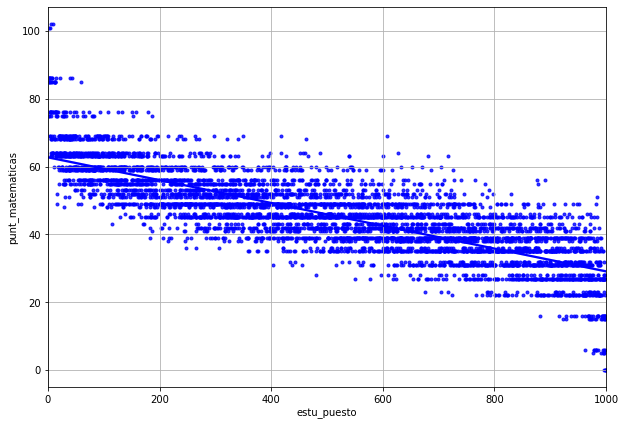

In [6]:
plt.figure(figsize=(10,7))
sns.regplot(x="estu_puesto", y="punt_matematicas", data=df.sample(frac=0.01), color='b', marker='.')
plt.xlim(0,1000)
plt.grid(True)

Matriz de correlación de puntajes, entre más cercano a 1 más cercana es la relación directamente proporcional y entre más se acerca a -1, más cercana es la relación inversamente proporcional

In [8]:
df[['punt_lenguaje', 'punt_matematicas', 'punt_c_sociales', 'punt_filosofia',
    'punt_biologia', 'punt_quimica', 'punt_ingles', 'estu_puesto']].corr()

,punt_lenguaje,punt_matematicas,punt_c_sociales,punt_filosofia,punt_biologia,punt_quimica,punt_ingles,estu_puesto
punt_lenguaje,1.000000,0.544898,0.583345,0.506928,0.530331,0.405558,0.381194,-0.798388
punt_matematicas,0.544898,1.000000,0.546809,0.479787,0.529709,0.484575,0.382180,-0.807133
punt_c_sociales,0.583345,0.546809,1.000000,0.541132,0.548476,0.433569,0.404164,-0.765617
punt_filosofia,0.506928,0.479787,0.541132,1.000000,0.509042,0.382835,0.324781,-0.671119
punt_biologia,0.530331,0.529709,0.548476,0.509042,1.000000,0.412005,0.357881,-0.698120
punt_quimica,0.405558,0.484575,0.433569,0.382835,0.412005,1.000000,0.323411,-0.593562
punt_ingles,0.381194,0.382180,0.404164,0.324781,0.357881,0.323411,1.000000,-0.501511
estu_puesto,-0.798388,-0.807133,-0.765617,-0.671119,-0.698120,-0.593562,-0.501511,1.000000


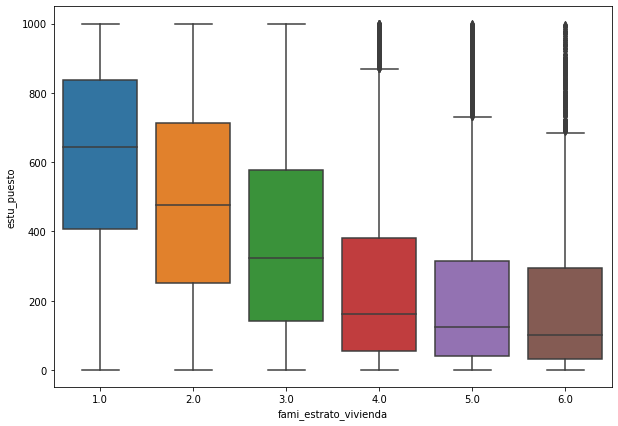

In [10]:
# Comportamiento de cuartiles en los puestos de la prueba con respecto al estrato socioconómico de la familia
plt.figure(figsize=(10,7))
sns.boxplot(x="fami_estrato_vivienda", y="estu_puesto", data=df)

Más ejemplos: ¿Cómo le fue a la gente que estudia en la noche?

Estas consultas podrían hacerse por departamento, institución o más factores

In [14]:
dfNoche = df.loc[df.cole_jornada == 'NOCHE']

In [15]:
dfNoche.describe()

,estu_edad,estu_nacimiento_dia,estu_nacimiento_mes,estu_nacimiento_anno,estu_zona_reside,estu_area_reside,cole_valor_pension,estu_trabaja,fami_estrato_vivienda,estu_veces_estado,fami_educa_padre,fami_educa_madre,fami_ocup_padre,fami_ocup_madre,fami_nivel_sisben,fami_pisos_hogar,fami_personas_hogar,fami_telefono_fijo,fami_celular,fami_internet,fami_servicio_television,fami_computador,fami_lavadora,fami_nevera,fami_horno,fami_dvd,fami_microondas,fami_automovil,fami_ing_fmiliar_mensual,punt_lenguaje,punt_matematicas,punt_c_sociales,punt_filosofia,punt_biologia,punt_quimica,punt_fisica,punt_ingles,punt_comp_flexible,estu_puesto
count,38562.000000,38396.000000,38396.000000,38396.000000,38440.000000,38559.000000,38394.000000,37886.000000,38289.000000,38478.000000,38349.000000,38343.000000,38336.000000,38336.000000,38527.000000,38513.000000,38527.000000,38527.000000,38544.000000,38527.000000,38527.000000,38431.000000,38527.000000,38544.000000,38527.000000,38527.000000,38527.000000,38527.000000,38525.000000,38562.000000,38562.000000,38562.000000,38562.000000,38562.000000,38562.000000,38562.000000,38562.000000,38562.000000,38561.000000
mean,22.137182,15.534144,6.686894,1988.264611,8.554501,1.148214,2.298224,2.431954,1.702343,0.042648,17.182247,14.435282,21.183535,21.646546,1.973058,2.712097,4.902614,0.394554,0.906678,0.246321,0.542321,0.981395,0.501415,0.821866,0.330521,0.585849,0.198925,0.088639,1.804179,40.199186,38.155127,39.860355,34.177532,41.008765,40.522094,40.413620,39.796380,31.440278,695.272451
std,8.290635,8.755979,3.458480,8.285864,2.567499,0.355317,3.674631,3.189382,0.778394,0.240257,25.120744,19.789438,3.359689,2.363336,1.399120,1.006441,2.013430,0.488761,0.290887,0.430873,0.498212,1.407516,0.500004,0.382631,0.470407,0.492581,0.399197,0.284226,0.817482,10.150514,10.252531,8.915509,11.418664,9.403921,7.674148,9.110137,6.535342,21.089383,235.642148
min,9.000000,1.000000,1.000000,1930.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,17.000000,8.000000,4.000000,1986.000000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,9.000000,9.000000,19.000000,21.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.000000,31.000000,34.000000,28.000000,37.000000,37.000000,35.000000,36.000000,5.000000,536.000000
50%,19.000000,15.000000,7.000000,1992.000000,10.000000,1.000000,0.000000,0.000000,2.000000,0.000000,10.000000,10.000000,21.000000,22.000000,1.000000,2.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,41.000000,39.000000,40.000000,33.000000,41.000000,41.000000,41.000000,41.000000,42.000000,747.000000
75%,24.000000,23.000000,10.000000,1993.000000,10.000000,1.000000,8.000000,6.000000,2.000000,0.000000,12.000000,12.000000,23.000000,22.000000,2.000000,4.000000,6.000000,1.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,46.000000,45.000000,46.000000,41.000000,48.000000,46.000000,47.000000,43.000000,50.000000,894.000000
max,81.000000,31.000000,12.000000,2003.000000,10.000000,2.000000,12.000000,7.000000,6.000000,3.000000,99.000000,99.000000,26.000000,26.000000,5.000000,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,91.000000,102.000000,107.000000,84.000000,90.000000,86.000000,86.000000,89.000000,76.000000,1000.000000


In [16]:
dfNoche[['punt_lenguaje', 'punt_matematicas', 'punt_c_sociales', 'punt_filosofia',
    'punt_biologia', 'punt_quimica', 'punt_ingles', 'estu_puesto']].corr()

,punt_lenguaje,punt_matematicas,punt_c_sociales,punt_filosofia,punt_biologia,punt_quimica,punt_ingles,estu_puesto
punt_lenguaje,1.000000,0.408850,0.441911,0.391265,0.396635,0.254615,0.152423,-0.733211
punt_matematicas,0.408850,1.000000,0.372305,0.338361,0.375855,0.322607,0.150983,-0.736099
punt_c_sociales,0.441911,0.372305,1.000000,0.414152,0.395895,0.240666,0.139835,-0.667456
punt_filosofia,0.391265,0.338361,0.414152,1.000000,0.425715,0.240915,0.120317,-0.585198
punt_biologia,0.396635,0.375855,0.395895,0.425715,1.000000,0.258735,0.120634,-0.596959
punt_quimica,0.254615,0.322607,0.240666,0.240915,0.258735,1.000000,0.097367,-0.471502
punt_ingles,0.152423,0.150983,0.139835,0.120317,0.120634,0.097367,1.000000,-0.284617
estu_puesto,-0.733211,-0.736099,-0.667456,-0.585198,-0.596959,-0.471502,-0.284617,1.000000


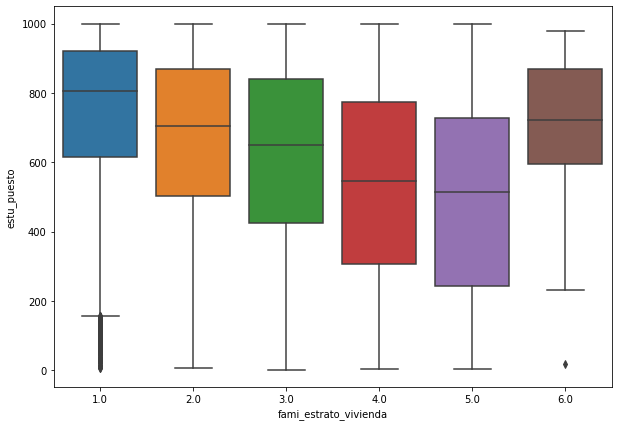

In [18]:
# Comportamiento de cuartiles en los puestos de la prueba con respecto al estrato socioconómico de la familia
# JORNADA NOCTURNA
plt.figure(figsize=(10,7))
sns.boxplot(x="fami_estrato_vivienda", y="estu_puesto", data=dfNoche)